In [11]:
from desc.grid import Grid, LinearGrid
from desc.backend import jnp
import matplotlib.pyplot as plt
import desc.equilibrium
from desc.equilibrium import Equilibrium
from desc.plotting import plot_3d
import numpy as np
import plotly.graph_objects as go

In [12]:
def read_and_reshape(filename, n_cols=4):
    data = np.loadtxt(filename, delimiter='\t')
    n_rows, total_cols = data.shape
    
    # Calculate n_components
    n_components = total_cols // n_cols
    
    # Reshape the data into the desired 3D shape
    reshaped_data = np.zeros((n_components, n_rows, n_cols))
    for i in range(n_components):
        reshaped_data[i] = data[:, i*n_cols:(i+1)*n_cols]

    return reshaped_data

In [13]:
def upload_data(filename):
    data = np.loadtxt(filename)
    return data

data = read_and_reshape('solution_test_eq_0112_M1_N1.h5.txt')

def Trajectory_Plot(solution, particle_index):
    fig, ax = plt.subplots()
    ax.plot(jnp.sqrt(solution[particle_index, :, 0]) * jnp.cos(solution[particle_index, :, 1]), jnp.sqrt(solution[particle_index, :, 0]) * jnp.sin(solution[particle_index, :, 1]))
    ax.set_aspect("equal", adjustable='box')
    plt.xlabel(r'$\sqrt{\psi}cos(\theta)$', fontsize=16)
    plt.ylabel(r'$\sqrt{\psi}sin(\theta)$', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    fig.set_size_inches(10.5, 10.5)
    plt.show()

def Quantity_Plot(tmax, solution, particle_index):
    time = jnp.linspace(0, tmax, len(solution[particle_index, :, 0]))
    fig, axs = plt.subplots(2, 2)
    axs[0, 1].plot(time, solution[particle_index, :, 0], 'tab:orange')
    axs[0, 1].set_title(r'$\psi$ (t)', fontsize=16)
    axs[1, 0].plot(time, solution[particle_index, :, 1], 'tab:green')
    axs[1, 0].set_title(r'$\theta$ (t)', fontsize=16)
    axs[1, 1].plot(time, solution[particle_index, :, 2], 'tab:red')
    axs[1, 1].set_title(r'$\zeta$ (t)', fontsize=16)
    axs[0, 0].plot(time, solution[particle_index, :, 3], 'tab:blue')
    axs[0, 0].set_title(r"$v_{\parallel}$ (t)")
    for i in range(2):
        for j in range(2):
            axs[i, j].set_xlabel('Time (s)', fontsize=14)
            axs[i, j].set_ylabel('Quantity', fontsize=14)
            axs[i, j].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
            axs[i, j].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
            axs[i, j].tick_params(axis='both', which='major', labelsize=14)
    fig.set_size_inches(10.5, 10.5)
    plt.show()

def Trajectory_3D_Plot(solution, particle_index, data_desc_list):
    grid = LinearGrid(rho=np.sqrt(0.9), M = 100, N = 100)
    fig = plot_3d(eq, "B", alpha=0.3, grid=grid)
    for data_desc in data_desc_list:
        fig.add_trace(go.Scatter3d(x=data_desc["X"], y=data_desc["Y"], z=data_desc["Z"], mode='markers', marker_size=2))
    fig.show()

def Trajectory_All(solution):
    fig, ax = plt.subplots()
    for particle_index in range(len(solution)):
        ax.plot(jnp.sqrt(solution[particle_index, :, 0]) * jnp.cos(solution[particle_index, :, 1]), jnp.sqrt(solution[particle_index, :, 0]) * jnp.sin(solution[particle_index, :, 1]))
    ax.set_aspect("equal", adjustable='box')
    plt.xlabel(r'$\sqrt{\psi}cos(\theta)$', fontsize=16)
    plt.ylabel(r'$\sqrt{\psi}sin(\theta)$', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    fig.set_size_inches(10.5, 10.5)
    plt.show()


In [14]:
data.shape

(1, 20, 4)

In [15]:
eq = desc.io.load("eq_0112_M1_N1.h5")
eq._iota = eq.get_profile("iota").to_powerseries(order=eq.L, sym=True)
eq._current = None

/Users/joaobiu/Developer/StellaratorStuff/DESC/desc/io/hdf5_io.py:127: RuntimeWarning:


The object attribute '_rho' was not loaded from the file.
This is likely because the file containing 'FourierRZToroidalSurface' was created before '_rho' became an attribute of objects of class '<class 'desc.geometry.surface.FourierRZToroidalSurface'>'.
The user may verify that a default value has been set.
This warning will persist until the file is saved with the new object.

Note to developers: Add 'def _set_up(self)' as a method to class '<class 'desc.geometry.surface.FourierRZToroidalSurface'>'
(or the superclass where this new attribute is assigned) that assigns a value to '_rho'.
This method is called automatically when a file is loaded.
Recall that the testing suite will fail on warnings.

/Users/joaobiu/Developer/StellaratorStuff/DESC/desc/io/hdf5_io.py:127: RuntimeWarning:


The object attribute '_shift' was not loaded from the file.
This is likely because the file containing 'FourierRZCu

In [16]:
grid_list = [Grid(np.vstack((np.sqrt(data[i, :, 0]), data[i, :, 1], data[i, :, 2])).T,sort=False) for i in range(data.shape[0])]

data_desc_list = [eq.compute(["X", "Y", "Z"], grid) for grid in grid_list]

<Figure size 431.653x287.769 with 0 Axes>

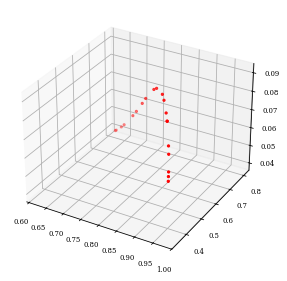

In [17]:
def plot_trajectory(ax=None, **kwargs):
    if ax is None:
        fig = plt.figure()
        ax = plt.figure().add_subplot(projection='3d')
    for data_desc in data_desc_list:
        ax.scatter(data_desc["X"], data_desc["Y"], data_desc["Z"], **kwargs)
  
    return ax

ax = plot_trajectory(color="r", marker=".")
# ax = plot_trajectory(data2, ax=ax, color="b", marker=".")

In [ ]:
grid = LinearGrid(rho=np.sqrt(0.5), M = 100, N = 100)
fig = plot_3d(eq, "B", alpha=0.3, grid=grid)
for data_desc in data_desc_list:
    fig.add_trace(go.Scatter3d(x=data_desc["X"], y=data_desc["Y"], z=data_desc["Z"], mode='markers', marker_size=2))
fig.show()
# fig.write_image("surface_and_tracing.png")

: 

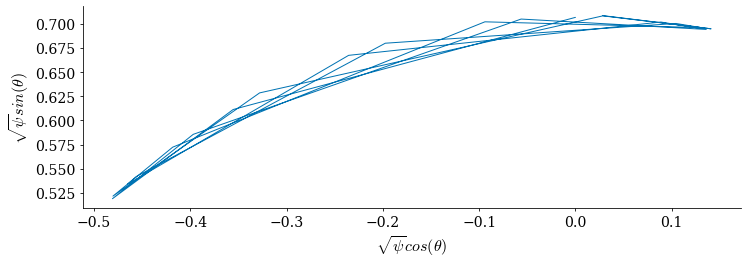

In [19]:
Trajectory_All(data)

In [20]:
Quantity_Plot(1e-2, data, 3)

IndexError: index 3 is out of bounds for axis 0 with size 1

In [ ]:
def objective(solution):
    new = jnp.repeat(solution[:, :, 0][:, 0:1], solution[:, :, 0].shape[1], axis=1)
    return jnp.sum(jnp.sum((solution[:, :, 0] - new)**2, axis=-1), axis=-1)

In [ ]:
objective(data)

Array(8.36691041, dtype=float64)

In [ ]:
def old_objective(solution, i):
    return jnp.sum((solution[i, :, 0] - solution[i, 0, 0]) * (solution[i, :, 0] - solution[i, 0, 0]), axis=-1)

old_objective(data, 17)

Array(0.88757281, dtype=float64)